In [2]:
# https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

# holiday                Categorical    US National holidays plus regional holiday, Minnesota State Fair
# temp                   Numeric        Average temp in kelvin
# rain_1h                Numeric        Amount in mm of rain that occurred in the hour
# snow_1h                Numeric        Amount in mm of snow that occurred in the hour
# clouds_all             Numeric        Percentage of cloud cover
# weather_main           Categorical    Short textual description of the current weather
# weather_description    Categorical    Longer textual description of the current weather
# date_time              DateTime       Hour of the data collected in local CST time
# traffic_volume         Numeric        Hourly I-94 ATR 301 reported westbound traffic volume

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
pwd

'/Users/dikshaaswal/Documents/Personal_Projects/traffic-volume-anomaly-detection/notebooks'

In [6]:
data = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv')

In [8]:
data.head(5)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [10]:
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [12]:
data.holiday.unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [14]:
data.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [34]:
data['date_time'] = pd.to_datetime(data['date_time'])
# plt.plot(data['date_time'], data['traffic_volume'])
# plt.xlabel('Time')
# plt.ylabel('Traffic Volume')
# plt.title('Traffic Volume Over Time')
# plt.show()

In [36]:
data.weather_description.value_counts()

weather_description
sky is clear                           13391
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain       

In [38]:
# | Phase                          | Use               | Reason                   |
# | ------------------------------ | ----------------- | ------------------------ |
# | Cleaning, mapping, resampling  | `pandas`, `NumPy` | Fast and expressive      |
# | Modeling, training, prediction | `PyTorch`         | Optimized for GPU and DL |


In [40]:
weather_map = {
    'sky is clear': 'clear sky',
    'Sky is Clear': 'clear sky',
    
    'scattered clouds': 'cloudy',
    'broken clouds': 'cloudy',
    'overcast clouds': 'cloudy',
    'few clouds': 'cloudy',
    
    'light rain': 'rain',
    'moderate rain': 'rain',
    'freezing rain': 'rain',
    'light intensity shower rain': 'rain',
    'heavy intensity rain': 'heavy rain',
    'very heavy rain': 'heavy rain',
    'light intensity drizzle': 'drizzle',
    'drizzle': 'drizzle',
    'shower drizzle': 'drizzle',
    'heavy intensity drizzle': 'heavy drizzle',
    
    'light snow': 'snow',
    'light shower snow' : 'snow',
    'snow': 'snow',
    'heavy snow': 'heavy snow',
    'shower snow': 'heavy snow',
    

    
    'thunderstorm': 'storm',
    'thunderstorm with light rain': 'storm',
    'thunderstorm with heavy rain': 'storm',
    'thunderstorm with rain': 'storm',
    'thunderstorm with light drizzle': 'storm',
    'thunderstorm with drizzle': 'storm',
    'squalls': 'storm',

    'light rain and snow' : 'rain and snow',
    'sleet' : 'rain and snow'
    

    # Any unmatched descriptions will stay as-is
}

In [42]:
data['weather_description'] = data['weather_description'].str.lower()
data['weather_grouped'] = data['weather_description'].map(weather_map).fillna(data['weather_description'])


In [44]:
data['weather_grouped'].value_counts()

weather_grouped
cloudy                                 15164
clear sky                              13391
mist                                    5950
rain                                    5051
snow                                    2250
drizzle                                 1757
haze                                    1360
fog                                      912
proximity thunderstorm                   673
heavy snow                               617
heavy rain                               485
storm                                    300
proximity shower rain                    136
heavy drizzle                             64
proximity thunderstorm with rain          52
smoke                                     20
proximity thunderstorm with drizzle       13
rain and snow                              9
Name: count, dtype: int64

In [46]:
unmapped = data[~data['weather_description'].isin(weather_map.keys())]['weather_description'].unique()
print("Unmapped descriptions:", unmapped)

Unmapped descriptions: ['mist' 'haze' 'fog' 'proximity shower rain' 'proximity thunderstorm'
 'proximity thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'smoke']


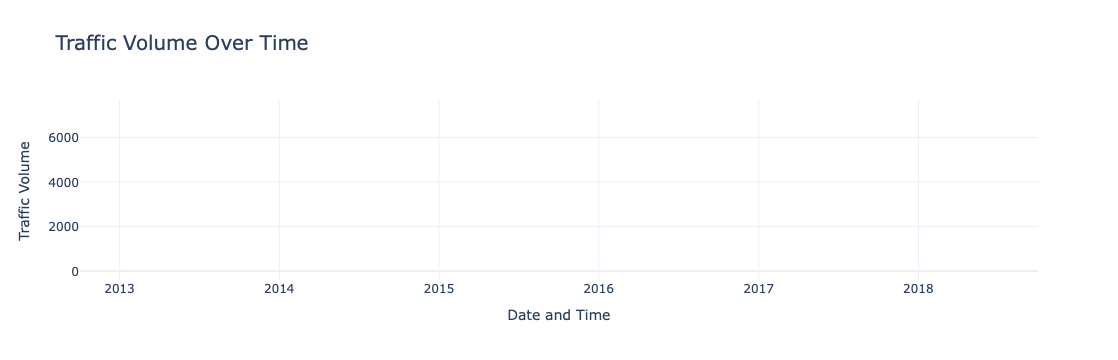

In [48]:


# Create a time-series plot using Plotly
fig = px.line(
    data,
    x='date_time',
    y='traffic_volume',
    title='Traffic Volume Over Time',
    labels={'date_time': 'Date and Time', 'traffic_volume': 'Traffic Volume'},
    template='plotly_white'
)

fig.update_traces(line=dict(color='darkblue'))
fig.update_layout(title_font_size=20, xaxis_title_font_size=14, yaxis_title_font_size=14)

fig.show()


/var/folders/83/vc4r71x14jj87cjy3gz3mc3c0000gn/T/ipykernel_81806/2280149621.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



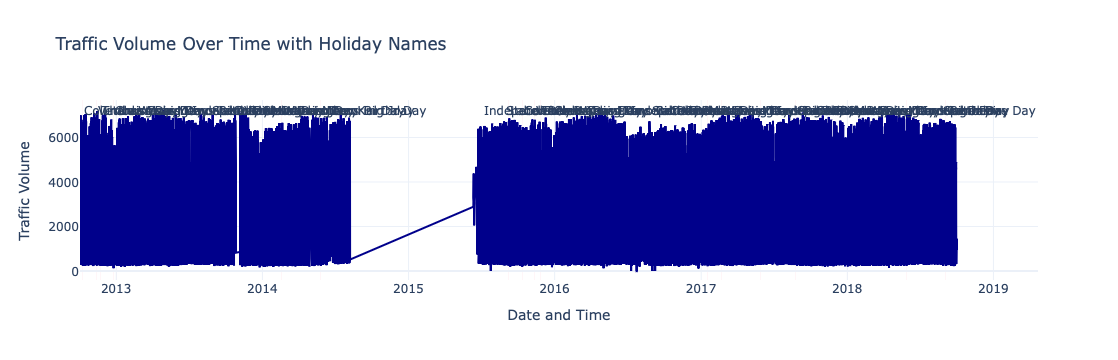

In [50]:

# Filter out valid holidays (non-null and not "None")
holiday_periods = data[data['holiday'].notna() & (data['holiday'] != 'None')]
holiday_periods['date'] = holiday_periods['date_time'].dt.date

# Group by date to get the first holiday label for each unique holiday date
holiday_labels = holiday_periods.groupby('date')['holiday'].first().reset_index()

# Create the line chart
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['date_time'],
    y=data['traffic_volume'],
    mode='lines',
    name='Traffic Volume',
    line=dict(color='darkblue')
))

# Add vertical shaded bands with holiday names
for _, row in holiday_labels.iterrows():
    start = pd.to_datetime(f"{row['date']} 00:00:00")
    end = pd.to_datetime(f"{row['date']} 23:59:59")
    fig.add_vrect(
        x0=start, x1=end,
        fillcolor="lightpink", opacity=0.3,
        layer="below", line_width=0,
        annotation_text=row['holiday'], annotation_position="top left"
    )

# Layout
fig.update_layout(
    title="Traffic Volume Over Time with Holiday Names",
    xaxis_title="Date and Time",
    yaxis_title="Traffic Volume",
    template="plotly_white"
)

fig.show()

In [194]:
data.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [196]:
data

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0         NaN  288.28      0.0      0.0          40        Clouds   
1         NaN  289.36      0.0      0.0          75        Clouds   
2         NaN  289.58      0.0      0.0          90        Clouds   
3         NaN  290.13      0.0      0.0          90        Clouds   
4         NaN  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description           date_time  traffic_volume  \
0            scattered clouds 2012-10-02 09:00:00            5545   
1               broken clouds 2012-10-02 10:00:00            4516   
2             overcast clouds 2012-10-02 11:00:00            4767   
3             overcast clouds 2012-10-02 12:00:00            5026   
4               broken clouds 2012-10-02 13:00:00            4918   
...                       ...                 ...             ...   
48199           broken clouds 2018-09-30 19:00:00            3543   
48200         overcast clouds 2018-09-30 20:00:00            2781   
48201  proximity thunderstorm 2018-09-30 21:00:00            2159   
48202         overcast clouds 2018-09-30 22:00:00            1450   
48203         overcast clouds 2018-09-30 23:00:00             954   

              weather_grouped  
0                      cloudy  
1                      cloudy  
2                      cloudy  
3                      cloudy  
4                      cloudy  
...                       ...  
48199                  cloudy  
48200                  cloudy  
48201  proximity thunderstorm  
48202                  cloudy  
48203                  cloudy  

[48204 rows x 10 columns]

In [54]:
data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume weather_grouped  \
0    scattered clouds 2012-10-02 09:00:00            5545          cloudy   
1       broken clouds 2012-10-02 10:00:00            4516          cloudy   
2     overcast clouds 2012-10-02 11:00:00            4767          cloudy   
3     overcast clouds 2012-10-02 12:00:00            5026          cloudy   
4       broken clouds 2012-10-02 13:00:00            4918          cloudy   

   weather_group  
0              1  
1              1  
2              1  
3              1  
4              1

In [56]:
# Select numerical columns only
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with traffic_volume
correlation = numeric_cols.corr()['traffic_volume'].sort_values(ascending=False)

# Convert to DataFrame for display
correlation_df = correlation.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Traffic Volume']


In [58]:
correlation_df

Feature  Correlation with Traffic Volume
0  traffic_volume                         1.000000
1            temp                         0.130299
2      clouds_all                         0.067054
3   weather_group                         0.007544
4         rain_1h                         0.004714
5         snow_1h                         0.000733

Temperature shows the strongest positive correlation.

Cloud cover has a weak positive correlation.

Rain and snow have almost no direct linear correlation

In [119]:
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek
data['is_weekend'] = data['dayofweek'] >= 5
data['month'] = data['date_time'].dt.month
data['date'] = data['date_time'].dt.date

# Mark holidays vs non-holidays
data['is_holiday'] = data['holiday'].apply(lambda x: 'Holiday' if pd.notna(x) else 'Non-Holiday')


# Seasonality

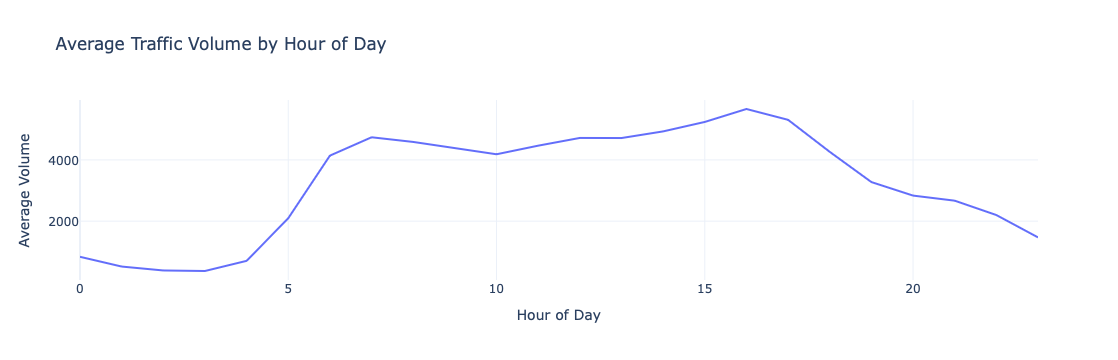

In [93]:
# Calculate average traffic volume by hour
hourly_avg = data.groupby('hour')['traffic_volume'].mean().reset_index()
fig_hour = px.line(hourly_avg, x='hour', y='traffic_volume',
                   title='Average Traffic Volume by Hour of Day',
                   labels={'traffic_volume': 'Average Volume', 'hour': 'Hour of Day'},
                   template='plotly_white')
fig_hour.show()

Morning peak likely around 7–9 AM

Evening peak around 3–5 PM

Low traffic from midnight to 5 AM

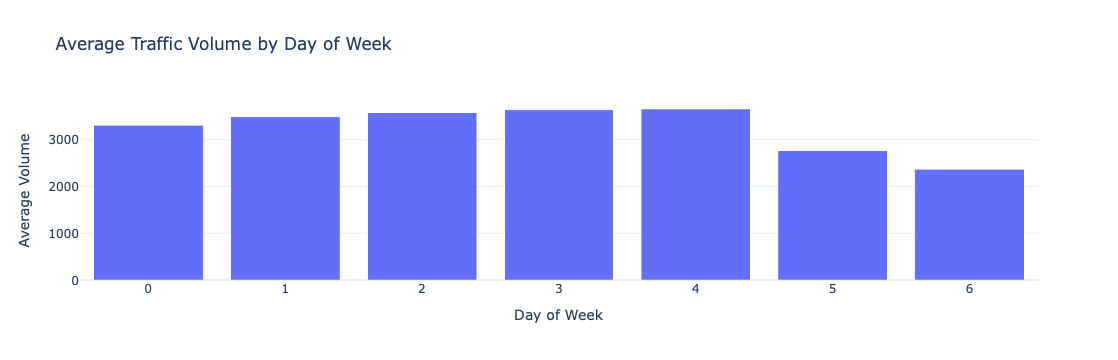

In [129]:
# Calculate average traffic volume by day of week
weekly_avg = data.groupby('day_of_week')['traffic_volume'].mean().reset_index()
fig_week = px.bar(weekly_avg, x='day_of_week', y='traffic_volume',
                  title='Average Traffic Volume by Day of Week',
                  labels={'traffic_volume': 'Average Volume', 'day_of_week': 'Day of Week'},
                  template='plotly_white')
fig_week.show()

Higher volume likely on weekdays (especially Tuesday–Thursday)

Lower volume on weekends (Saturday, Sunday)

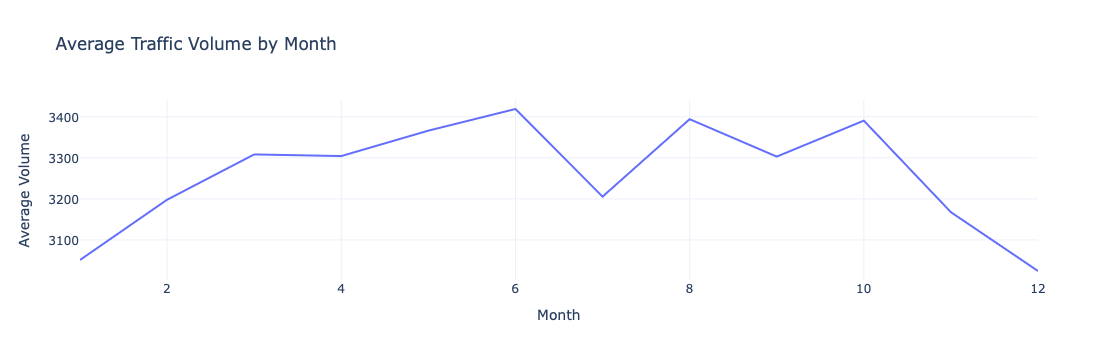

In [97]:
# Calculate average traffic volume by month
monthly_avg = data.groupby('month')['traffic_volume'].mean().reset_index()
fig_month = px.line(monthly_avg, x='month', y='traffic_volume',
                    title='Average Traffic Volume by Month',
                    labels={'traffic_volume': 'Average Volume', 'month': 'Month'},
                    template='plotly_white')

fig_month.show()

Dips in Vacation(July) or Hoiday(December) month

In [121]:
# Create a dictionary mapping date to holiday
holiday_map = data[data['holiday'].notna()].groupby('date')['holiday'].first().to_dict()

# Apply mapping to all rows based on date
data['holiday_full'] = data['date'].map(holiday_map)

# Create binary holiday label
data['is_holiday'] = data['holiday_full'].apply(lambda x: 'Holiday' if pd.notna(x) else 'Non-Holiday')


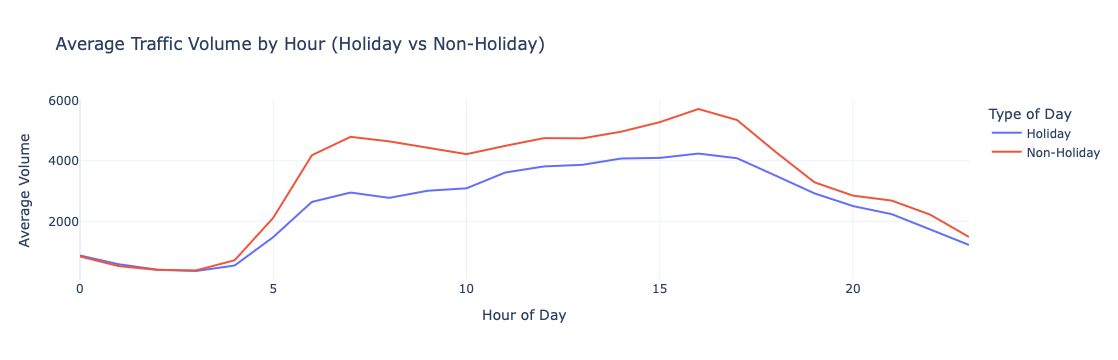

In [123]:
# Group by hour and holiday status to compare
holiday_hourly = data.groupby(['hour', 'is_holiday'])['traffic_volume'].mean().reset_index()

# Create interactive line plot
fig_holiday = px.line(
    holiday_hourly,
    x='hour',
    y='traffic_volume',
    color='is_holiday',
    title='Average Traffic Volume by Hour (Holiday vs Non-Holiday)',
    labels={'traffic_volume': 'Average Volume', 'hour': 'Hour of Day', 'is_holiday': 'Type of Day'},
    template='plotly_white',
    
)

fig_holiday.show()

Holiday traffic is significantly lower during peak hours.

Non-holiday days show expected morning/evening peaks.

On holidays, people travel less or at different hours (e.g., mid-day vs rush hour)

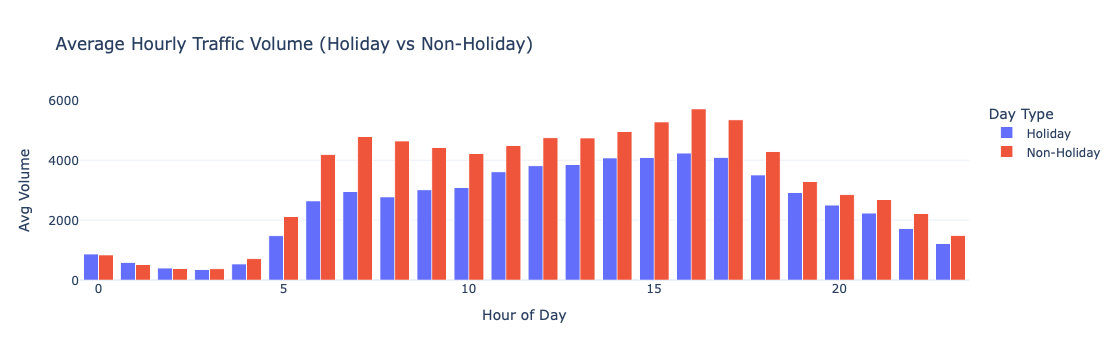

In [125]:

# Plot
fig = px.bar(
    holiday_hourly,
    x='hour',
    y='traffic_volume',
    color='is_holiday',
    barmode='group',
    title='Average Hourly Traffic Volume (Holiday vs Non-Holiday)',
    labels={'traffic_volume': 'Avg Volume', 'hour': 'Hour of Day', 'is_holiday': 'Day Type'},
    template='plotly_white'
)

fig.show()